A remake of the bar-and-whisker plot of statistical significance for the RDA paper based on RDA_bars_with_whiskers, but rewritten in much better style and to take advantage of more efficient loading of data.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [9]:
data_file = 'Data/decadal_stats.hdf'
results_df = pd.read_hdf(data_file)
results_df = results_df.sort_index().sort_index(axis=1)

In [10]:
#customized script that adds overbars to indicate time periods, and then on top of that a p-value for the significance of the change.
def addpvals(fig,ax,rects,errs,pvals):
    for rects,errs,pvals in zip(rects,errs,pvals):
        
        heights = [ rect.get_height() + err for rect,err in zip(rects,errs) ]            
        height = max(heights[0],heights[1],heights[2])
        yax = ax.get_ylim()
        yhgt = yax[1]-yax[0]
        
        x1 = rect1.get_x() + .175
        x2 = rect1.get_x() + .525
        y = height + .01*yhgt
        
        xx1 = rect1.get_x() + .4375
        xx2 = rect1.get_x() + .6125
        yy = y + .13*yhgt

        #'51-'79 v '80-'07
        ax.annotate("a", color='White', xy=(x1, y), xytext=(x1, y + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1.25, lengthB=.5', lw=1.0))

        ax.annotate("b", color='White', xy=(x2, y), xytext=(x2, y + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=1.25, lengthB=.5', lw=1.0))

        #add lines
        plt.plot([x1, (x1+x2)/2], [y + .008*yhgt, y + .04*yhgt], 'k-', lw=1)
        plt.plot([x2, (x1+x2)/2], [y + .008*yhgt, y + .04*yhgt], 'k-', lw=1)

        #add p-value
        if pval1 < .025:
            if pval1 < .005:
                plt.text((x1+x2)/2, y + .06*yhgt,'p<.001', horizontalalignment = 'center',fontsize = 14, \
                    weight='bold', style='italic')

            else:
                plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14,\
                    weight='bold')
        elif pval1 > .975:            
            if pval1 > .995:
                plt.text((x1+x2)/2, y + .06*yhgt,'p>.999', horizontalalignment = 'center',fontsize = 14, \
                    weight='bold', style='italic')
            else:
                plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14,\
                    weight='bold')
        else:
            plt.text((x1+x2)/2, y + .06*yhgt,'p=' + str(round(pval1,3)), horizontalalignment = 'center', fontsize = 14)
            
        print(pval1)
        print(pval2)


        #'80-'93 v '94-'07
        ax.annotate("a", color='White', xy=(xx1, yy), xytext=(xx1, yy + .02*yhgt),\
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=.6, lengthB=.5', lw=1.0))

        ax.annotate("b", color='White', xy=(xx2, yy), xytext=(xx2, yy + .02*yhgt), 
            fontsize=15, ha='center', va='bottom',
            arrowprops=dict(arrowstyle='-[, widthB=.6, lengthB=.5', lw=1.0))

        #add lines
        plt.plot([xx1, (xx1+xx2)/2], [yy + .008*yhgt, yy + .03*yhgt], 'k-', lw=1)
        plt.plot([xx2, (xx1+xx2)/2], [yy + .008*yhgt, yy + .03*yhgt], 'k-', lw=1)

        #add p-value
        if pval2 < .025:
            if pval2 < .001:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p<.001', horizontalalignment = 'center',fontsize = 14,\
                         weight='bold', style='italic')
            else:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', \
                         fontsize = 14, weight='bold')
        elif pval2 > .975:            
            if pval2 > .999:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p>.999', horizontalalignment = 'center',fontsize = 14, \
                         weight='bold', style='italic')
            else:
                plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', \
                         fontsize = 14, weight='bold')
        else:
            plt.text((xx1+xx2)/2, yy + .06*yhgt,'p=' + str(round(pval2,3)), horizontalalignment = 'center', fontsize = 14)

In [11]:
N = 6               # number of data entries
ind = np.arange(N)              # the x locations for the groups
width1 = 0.35                   # bar width
width2 = 0.175

/Users/Siwen/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


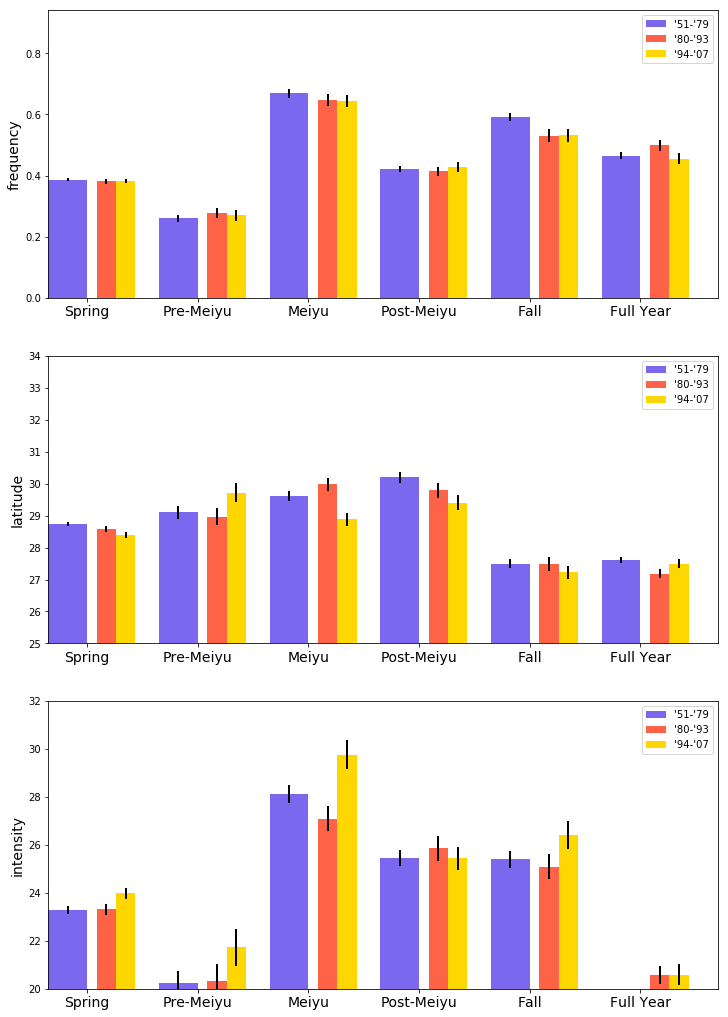

In [24]:
fig, axes = plt.subplots(3,1,figsize=(12,18), facecolor='w')

rects = []
colors = ['MediumSlateBlue','Tomato','Gold']
metrics = ['frequency','latitude','intensity']
my_error_kw={'ecolor':'Black','linewidth':2}
periods = ['p1','p1','p2']
widths = [width1, width2, width2]
xpositions = (ind,ind+width1,ind+width1+width2)
year_tags = ['8007_5179','9407_8093','9407_8093']
yranges = [[0,.94],[25,34],[20,32]]

for met,ax,yrange in zip(metrics,axes,yranges):
    
    #list of all 3 bar plots for a given subpanel
    sub_rects = []
    
    for (color, p, width, xpos, yr_tag) in zip(colors, periods, widths, xpositions,year_tags):
        vals = results_df.loc[(met,'mean_'+p),(slice(None),yr_tag)].values
        errs = results_df.loc[(met,'std_'+p),(slice(None),yr_tag)].values
        sub_rects.append(ax.bar(xpos,vals,width,color=color,yerr=errs,error_kw=my_error_kw))
    
    ax.set_ylim([yrange[0],yrange[1]])
    ax.set_xlim([-.175,5.875])  
    ax.set_ylabel(met, fontsize=14)
    ax.set_xticks(xpositions[0] + width)
    ax.set_xticklabels(('Spring', 'Pre-Meiyu', 'Meiyu', 'Post-Meiyu', 'Fall','Full Year'),\
                        fontsize=14)
    ax.legend((sub_rects[0], sub_rects[1], sub_rects[2]), ("'51-'79", "'80-'93", "'94-'07"))
    
    rects.append(sub_rects)   

    addpvals(fig,ax,sub_rects,errs, )